In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import pandas as pd
from scipy.stats import linregress

# BaTiO3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


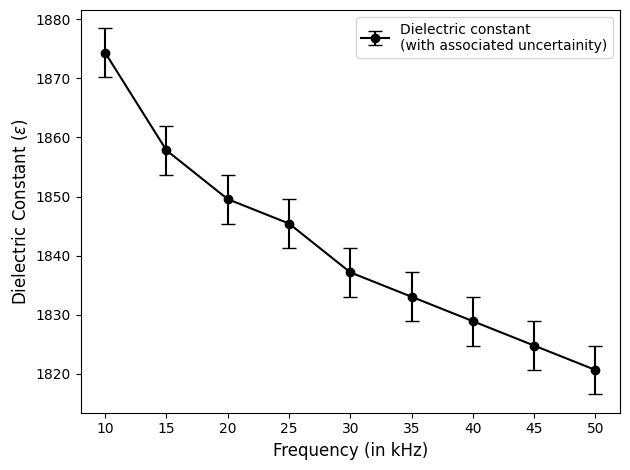

In [94]:
data = pd.read_excel('data.xlsx', sheet_name='batio3')
yerr = (data['dielectric_const']*0.002)/(data['r4 (kohm)'])
plt.errorbar(data['f'], data['dielectric_const'], yerr, fmt='-ko', capsize=5, label='Dielectric constant\n(with associated uncertainity)')
plt.legend()
plt.xlabel(r'Frequency (in kHz)', fontsize=12)
plt.ylabel(r'Dielectric Constant ($\epsilon$)', fontsize=12)
plt.tight_layout()
plt.savefig('images/batio3_e.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


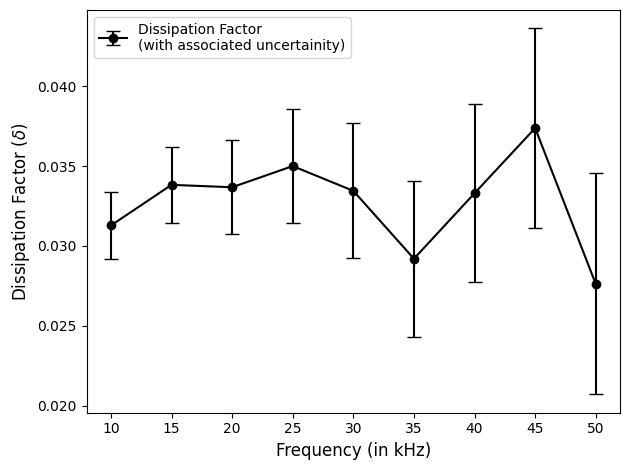

In [95]:
yerr1 = data['dissipation']*np.sqrt((0.002/data['r4 (kohm)'])**2 + (50/data['c4 (pf)'])**2 + (1/data['f'])**2)
plt.errorbar(data['f'], data['dissipation'], yerr1/2, fmt='-ko', capsize=5, label='Dissipation Factor\n(with associated uncertainity)')
plt.legend()
plt.xlabel(r'Frequency (in kHz)', fontsize=12)
plt.ylabel(r'Dissipation Factor ($\delta$)', fontsize=12)
plt.tight_layout()
plt.savefig('images/batio3_d.eps')

# MLCC

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


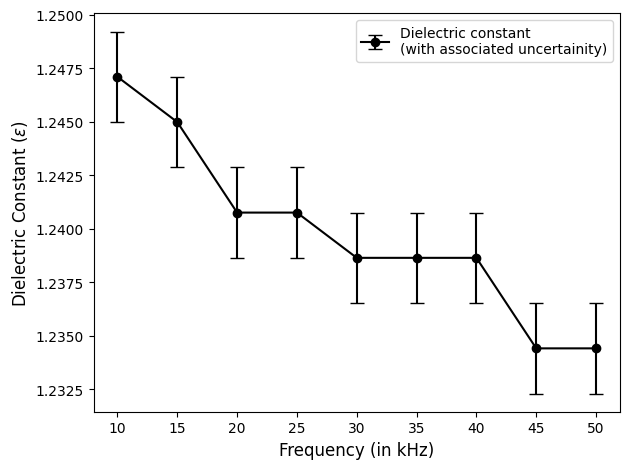

In [96]:
data = pd.read_excel('data.xlsx', sheet_name='mlcc')
yerr = (data['dielectric_const']*0.002)/(data['r4 (kohm)'])
plt.errorbar(data['f'], data['dielectric_const'], yerr/2, fmt='-ko', capsize=5, label='Dielectric constant\n(with associated uncertainity)')
plt.legend()
plt.xlabel(r'Frequency (in kHz)', fontsize=12)
plt.ylabel(r'Dielectric Constant ($\epsilon$)', fontsize=12)
plt.tight_layout()
plt.savefig('images/mlcc_e.eps')

# Disc Capacitor

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


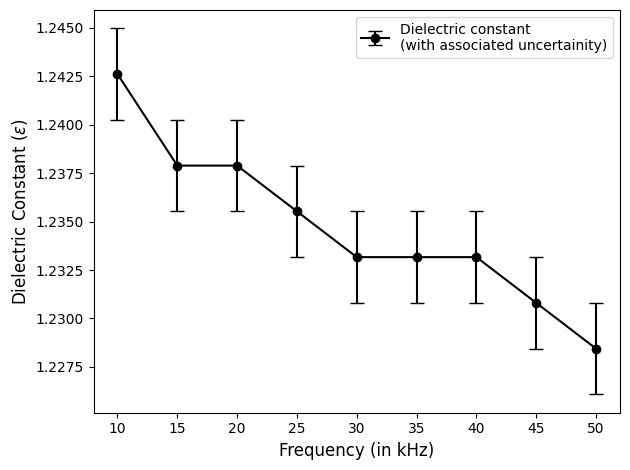

In [97]:
data = pd.read_excel('data.xlsx', sheet_name='disc')
yerr = (data['dielectric_const']*0.002)/(data['r4 (kohm)'])
plt.errorbar(data['f'], data['dielectric_const'], yerr/2, fmt='-ko', capsize=5, label='Dielectric constant\n(with associated uncertainity)')
plt.legend()
plt.xlabel(r'Frequency (in kHz)', fontsize=12)
plt.ylabel(r'Dielectric Constant ($\epsilon$)', fontsize=12)
plt.tight_layout()
plt.savefig('images/disc_e.eps')

# Temperature variation

In [45]:
def gaussian(x, A, mu, sigma, c): return A*np.exp(-(x-mu)**2/(2*sigma**2)) + c
def fit_gauss(xs, ys, p0=None):
    popt, pcov = curve_fit(f=gaussian, xdata=xs, ydata=ys, p0=p0, maxfev=5000)
    xFit = np.arange(min(xs)-20,max(xs)+20, 2e-4)
    A, mu, sigma, c = popt#1.741, 178.1, 7.164, 1.5e-2
    print(mu)
    return xFit, gaussian(xFit, A, mu, sigma, c), (A, mu, sigma, c)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


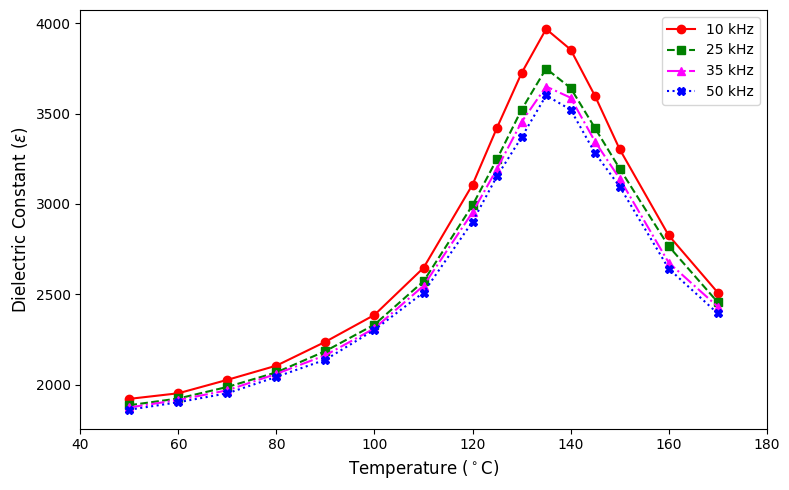

In [13]:
data = pd.read_excel('data.xlsx', sheet_name='temp')
m,n=0,16
t = data['f'][m:n]
colors = ['r', 'g', 'magenta', 'b']
styles = ['o', 's', '^', 'X']
ls = ['-', '--', '-.', ':']
plt.figure(figsize=(8,5))
for i, freq in enumerate((10,25,35,50)):
    e = data[f'e{freq}'][m:n]
    # fits = fit_gauss(f,e, p0=(2000,130,50,2000))    
    # plt.plot(f, e, styles[i], linestyle='-', color=colors[i], label=f'{freq} kHz')
    # yerr = (e*0.002)/(data[f'r{freq}'][m:n])
    # plt.errorbar(t, e, yerr=yerr, fmt='-ko', capsize=5, label='')
    plt.plot(t, e, styles[i], linestyle=ls[i], color=colors[i], label=f'{freq} kHz')
    # plt.plot(fits[0], fits[1], color=colors[i])
    # break
plt.legend()
plt.xlim(40,180)
plt.xlabel(r'Temperature ($^\circ$C)', fontsize=12)
plt.ylabel(r'Dielectric Constant ($\epsilon$)', fontsize=12)
# plt.grid()
plt.tight_layout()
plt.savefig('images/temp.eps')

In [52]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.linspace(min(xs), max(xs), 100)
    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 
    
    # print(min(xs)- max(xs))
    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

For f = 10 kHz


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


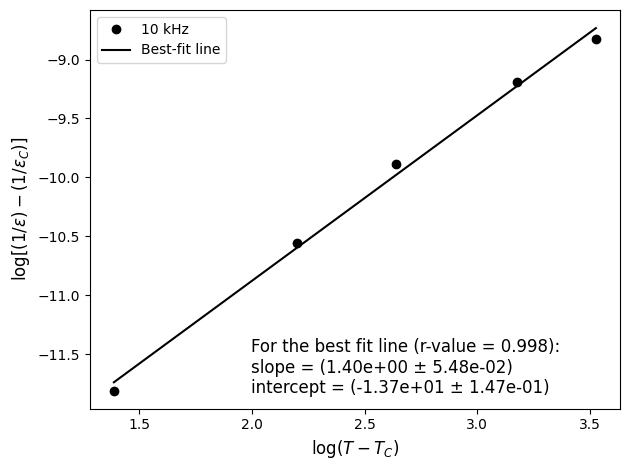

For f = 25 kHz


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


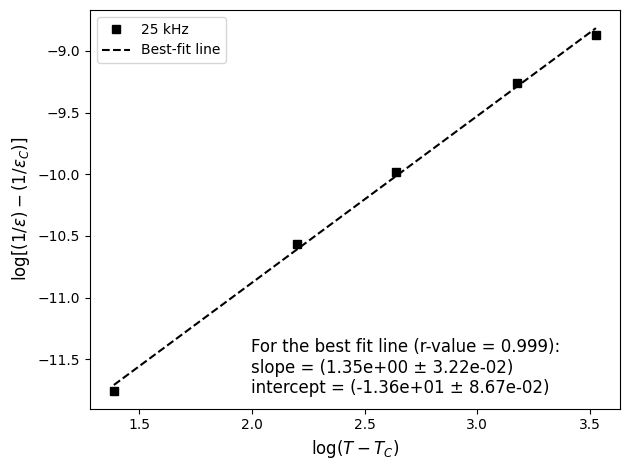

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


For f = 35 kHz


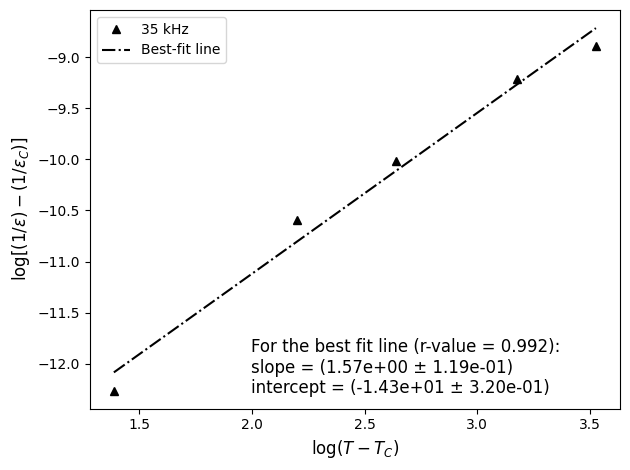

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


For f = 50 kHz


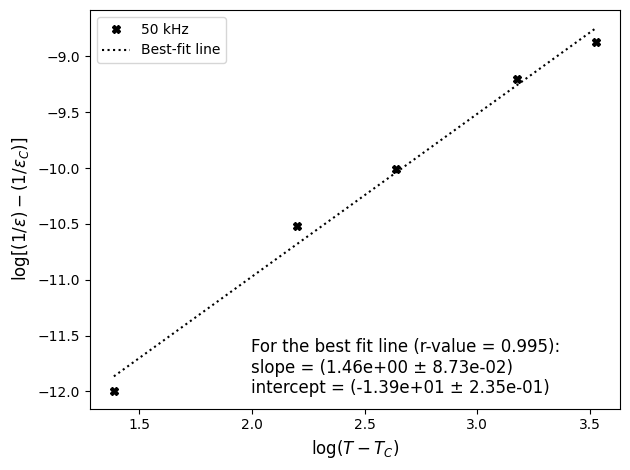

In [111]:
data = pd.read_excel('data.xlsx', sheet_name='temp')
m,n=11,16
t = np.array(data['f'][m:n])
tc = 136
xs = np.log(abs((t)-(tc)))

colors = ['r', 'g', 'b', 'k']
styles = ['o', 's', '^', 'X']
ls = ['-', '--', '-.', ':']

deltas = []
d_deltas = []

for i, freq in enumerate((10,25,35,50)):
    e = np.array(data[f'e{freq}'])
    ys = np.log((1/e[m:n])-(1/np.nanmax(e)))

    fits = fit_line(xs, ys)    
    plt.plot(xs, ys, styles[i], color='k', label=f'{freq} kHz')
    plt.plot(fits[0], fits[1], linestyle=ls[i], color='k', label='Best-fit line')
    print(f'For f = {freq} kHz')
    
    plt.legend()
    plt.xlabel(r'$\log(T-T_C)$', fontsize=12)
    plt.ylabel(r'$\log[(1/\epsilon)-(1/\epsilon_C)]$', fontsize=12)
    plt.text(0.4,0.17,fits[4], fontsize=12,transform=plt.gcf().transFigure)
    
    deltas.append(fits[2][0])
    d_deltas.append(fits[3][0])

    plt.tight_layout()
    plt.savefig(f'images/TC{freq}.eps')
    plt.show()

In [118]:
# final delta with error
d_deltas = np.array(d_deltas)
np.average(deltas), np.sqrt(d_deltas@d_deltas)/4

(1.446574437494741, 0.04010694334152097)